### Project 1 Visualization of Netflix Subscriber Count

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
Netflix_df = pd.read_excel('Netflix Quarterly Regional Information 2017-2023.xlsx', sheet_name='Regional Information')
Netflix_df.head()

,Date,Region,Revenue,Paid net membership additions (losses)_in thousands,Paid memberships at end of period_in thousands,Average paying memberships_in thousands,Average revenue per membership,Average revenue per membership % change as compared to prior-year period
0,2017-03-31,UCAN,1586167,1665,54575,53743.0,9.84,0.16
1,2017-06-30,UCAN,1624397,1042,55617,55096.0,9.83,0.14
2,2017-09-30,UCAN,1674308,1162,56779,56198.0,9.93,0.08
3,2017-12-31,UCAN,1775987,1643,58422,57601.0,10.28,0.06
4,2018-03-31,UCAN,1976157,2487,60909,59666.0,11.04,0.12


In [3]:
Europe_Middle_East= Netflix_df[Netflix_df['Region'] == 'EMEA']
Europe_Middle_East.tail()

,Date,Region,Revenue,Paid net membership additions (losses)_in thousands,Paid memberships at end of period_in thousands,Average paying memberships_in thousands,Average revenue per membership,Average revenue per membership % change as compared to prior-year period
45,2022-03-31,EMEA,2561831,-303,73733,73885.0,11.56,0.00
46,2022-06-30,EMEA,2457235,-767,72966,73350.0,11.17,-0.04
47,2022-09-30,EMEA,2375814,568,73534,73250.0,10.81,-0.07
48,2022-12-31,EMEA,2350135,3195,76729,75132.0,10.43,-0.10
49,2023-03-31,EMEA,2517641,644,77373,77051.0,10.89,-0.06


In [4]:
Netflix_df.dtypes

Date                                                                        datetime64[ns]
Region                                                                              object
Revenue                                                                              int64
Paid net membership additions (losses)_in thousands                                  int64
Paid memberships at end of period_in thousands                                       int64
Average paying memberships_in thousands                                            float64
Average revenue per membership                                                     float64
Average revenue per membership % change as compared to prior-year period           float64
dtype: object

In [5]:
netflix_corr = Netflix_df.corr()
netflix_corr

C:\Users\junfe\AppData\Local\Temp\ipykernel_21648\25549863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  netflix_corr = Netflix_df.corr()


,Revenue,Paid net membership additions (losses)_in thousands,Paid memberships at end of period_in thousands,Average paying memberships_in thousands,Average revenue per membership,Average revenue per membership % change as compared to prior-year period
Revenue,1.000000,-0.188920,0.954573,0.952687,0.901311,0.195595
Paid net membership additions (losses)_in thousands,-0.188920,1.000000,-0.092402,-0.119679,-0.182120,-0.079107
Paid memberships at end of period_in thousands,0.954573,-0.092402,1.000000,0.995638,0.746683,0.103657
Average paying memberships_in thousands,0.952687,-0.119679,0.995638,1.000000,0.745843,0.090858
Average revenue per membership,0.901311,-0.182120,0.746683,0.745843,1.000000,0.340248
Average revenue per membership % change as compared to prior-year period,0.195595,-0.079107,0.103657,0.090858,0.340248,1.000000


In [6]:
Netflix_df['Paid net membership additions (losses)_in thousands'].max()

6956

Text(0.5, 1.0, 'Paid Membership Over Time by Region')

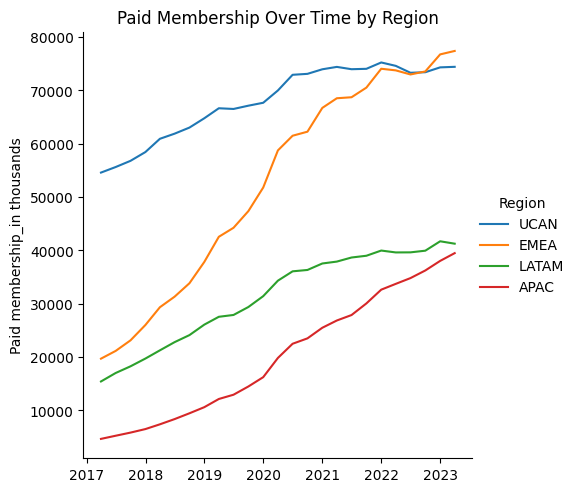

In [7]:
sns.relplot(x='Date', y='Paid memberships at end of period_in thousands', hue = 'Region', kind='line', data = Netflix_df)
plt.xlabel('')
plt.ylabel('Paid membership_in thousands')
plt.title('Paid Membership Over Time by Region')

In [8]:
Netflix_df_sum_membership = Netflix_df.groupby('Date')['Paid memberships at end of period_in thousands'].sum()
Netflix_df_unique_date = Netflix_df['Date'].unique()

Text(0.5, 1.0, 'Paid Membership Over Time')

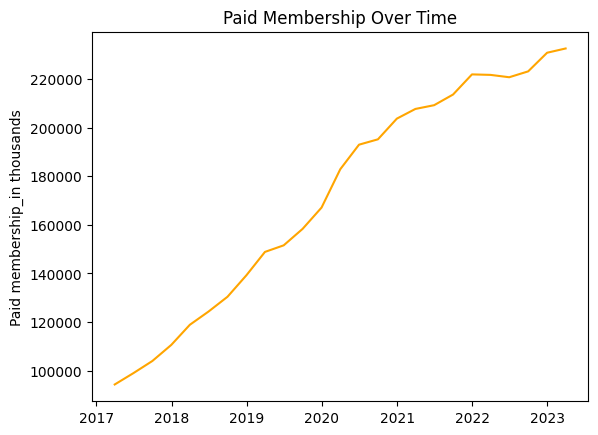

In [9]:
plt.plot(Netflix_df_unique_date , Netflix_df_sum_membership, color ='orange')
plt.ylabel('Paid membership_in thousands')
plt.title('Paid Membership Over Time')

From the plot we can infer that generally Netflix Trend chart of Paid Membership is largely influenced by the membership in EMEA Region which has the largest growth while the 

Text(0.5, 1.0, 'Paid Membership Over Time')

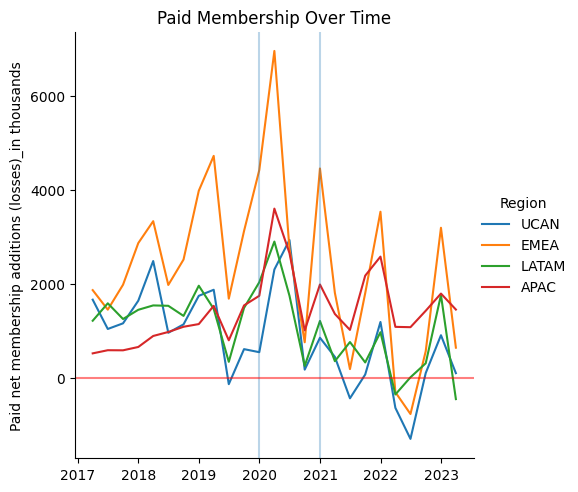

In [10]:
sns.relplot(x='Date', y='Paid net membership additions (losses)_in thousands', hue = 'Region', kind='line', 
            data = Netflix_df)

import datetime as dt

plt.axvline(dt.datetime(2020, 1, 1), alpha=0.3)
plt.axvline(dt.datetime(2020, 12, 31), alpha=0.3)
plt.axhline(y=0, color='red', alpha=0.5)
plt.xlabel('')
plt.title("Paid Membership Over Time")

An interesting phenomenom as we can see generally membership growth is at lowest during the 4th quarter 
with a significant drop in membership additions after 2020 and we can even see that there were periods where memberships losses

Text(40.83179861111111, 0.5, 'Average Revenue per Membership $USD')

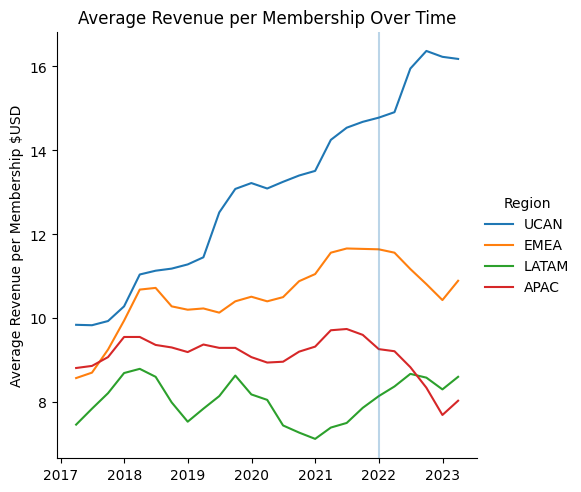

In [11]:

sns.relplot(x='Date', y='Average revenue per membership', hue = 'Region', kind='line',
            data = Netflix_df)
plt.title('Average Revenue per Membership Over Time')
plt.axvline(dt.datetime(2022, 1, 1), alpha=0.3)
plt.xlabel('')
plt.ylabel('Average Revenue per Membership $USD')

What is ARPU (Average Revenue Per Membership)? Average revenue per membership measures the amount of money 
that a company can expect to generate from an individual membership. 
It's calculated by dividing the business's total revenue by its total number of memberships

Text(0.5, 28.999999999999986, '')

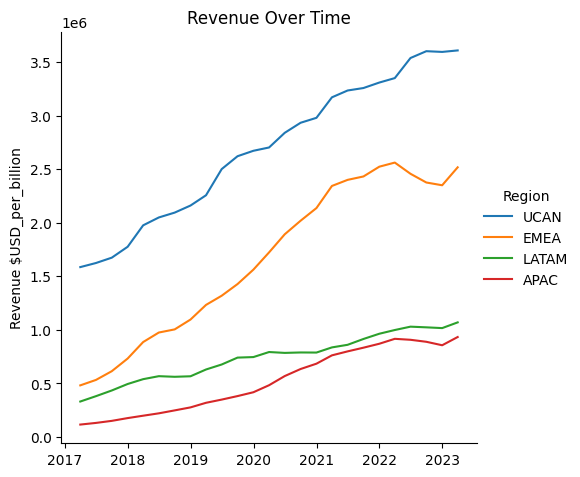

In [12]:
sns.relplot(x='Date', y='Revenue', hue = 'Region', kind='line',
            data = Netflix_df)
plt.title('Revenue Over Time')
plt.ylabel('Revenue $USD_per_billion')
plt.xlabel('')

Similar trends with other US stocks as we can see a drop in NFLX price in 2022 due to fear of recession 
which may have resulted in reduce spending as we can see that 
However, with the introduction of the ad-supported tier we can speculate that it may have contributed to increase signup in the US unlike the other 3 regions as the basic plans were limited to only some selected countries.

In [13]:
Netflix_price = pd.read_csv('Netflix Subscription Price by Countries.csv')
Netflix_price

,Country,Region,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month with Ads,Cost per Month Basic,Cost per Month Standard,Cost Per Month Premium
0,Albania,EMEA,6284,2295,3989,NaN,$5.29,$8.47,$10.59
1,Algeria,EMEA,6143,2120,4023,NaN,$7.99,$9.99,$11.99
2,Andorra,EMEA,5072,1963,3109,NaN,$8.47,$13.78,$19.08
3,Argentina,LATAM,5786,2191,3595,NaN,$3.59,$6.66,$9.74
4,Australia,APAC,6642,2355,4287,$4.76,$7.49,$11.57,$15.66
...,...,...,...,...,...,...,...,...,...
99,United Kingdom,EMEA,7482,2419,5063,$6.01,$8.42,$13.24,$19.26
100,United States,UCNA,6135,2299,3836,$6.99,$9.99,$15.49,$19.99
101,Uruguay,LATAM,5970,2185,3785,NaN,$8.99,$12.99,$15.99
102,Venezuela,LATAM,5630,2185,3445,NaN,$3.99,$5.99,$7.99


In [14]:
Netflix_price.dtypes

Country                    object
Region                     object
Total Library Size          int64
No. of TV Shows             int64
No. of Movies               int64
Cost Per Month with Ads    object
Cost per Month Basic       object
Cost per Month Standard    object
Cost Per Month Premium     object
dtype: object

In [15]:
Netflix_price = Netflix_price.rename(columns={'Cost Per Month with Ads':'Basic_plan_with_ads', 'Cost per Month Basic':'Basic_plan',
                'Cost per Month Standard':'Standard_plan', 'Cost Per Month Premium':'Premium_plan'})
Netflix_price.head()

,Country,Region,Total Library Size,No. of TV Shows,No. of Movies,Basic_plan_with_ads,Basic_plan,Standard_plan,Premium_plan
0,Albania,EMEA,6284,2295,3989,NaN,$5.29,$8.47,$10.59
1,Algeria,EMEA,6143,2120,4023,NaN,$7.99,$9.99,$11.99
2,Andorra,EMEA,5072,1963,3109,NaN,$8.47,$13.78,$19.08
3,Argentina,LATAM,5786,2191,3595,NaN,$3.59,$6.66,$9.74
4,Australia,APAC,6642,2355,4287,$4.76,$7.49,$11.57,$15.66


In [16]:
Netflix_price['Basic_plan_with_ads'] = Netflix_price['Basic_plan_with_ads'].str.strip('$')
Netflix_price['Basic_plan_with_ads'] = Netflix_price['Basic_plan_with_ads'].astype('float')

Netflix_price['Basic_plan'] = Netflix_price['Basic_plan'].str.strip('$')
Netflix_price['Basic_plan'] = Netflix_price['Basic_plan'].astype('float')

Netflix_price['Standard_plan'] = Netflix_price['Standard_plan'].str.strip('$')
Netflix_price['Standard_plan'] = Netflix_price['Standard_plan'].astype('float')

Netflix_price['Premium_plan'] = Netflix_price['Premium_plan'].str.strip('$')
Netflix_price['Premium_plan'] = Netflix_price['Premium_plan'].astype('float')

In [17]:
Netflix_price.head()
Netflix_price.dtypes

Country                 object
Region                  object
Total Library Size       int64
No. of TV Shows          int64
No. of Movies            int64
Basic_plan_with_ads    float64
Basic_plan             float64
Standard_plan          float64
Premium_plan           float64
dtype: object

In [18]:
region_map = {'Albania':'EMEA',
'Algeria':'EMEA',
'Andorra':'EMEA',
'Argentina':"LATAM",
'Australia':'APAC',
'Austria':'EMEA',
'Bahrain':'EMEA',
'Belgium':'EMEA',
'Bermuda':'EMEA',
'Bolivia':'LATAM',
'Bosnia & Herzegovina':'EMEA',
'Brazil':'LATAM',
'Bulgaria':'EMEA',
'Canada':'UCNA',
'Cape Verde':'EMEA',
'Chile':'LATAM',
'Colombia':'LATAM',
"Costa Rica":'LATAM',
'Côte d’Ivoire':'EMEA',
'Croatia':'EMEA',
'Czechia':'EMEA',
'Denmark':'EMEA',
'Ecuador':'LATAM',
'Egypt':'EMEA',
'El Salvador':'LATAM',
'Equatorial Guinea':'EMEA',
'Estonia':'EMEA',
'Fiji':"APAC",
'Finland':'EMEA',
'France':'EMEA',
'French Guiana':'LATAM',
'French Polynesia':'APAC',
'Germany':'EMEA',
'Ghana':'EMEA',
'Gibraltar':'EMEA',
'Greece':'EMEA',
'Guatemala':'LATAM',
'Guernsey':'EMEA',
'Honduras':'LATAM',
'Hong Kong':'APAC',
'Hungary':'EMEA',
'Iceland':'EMEA',
'India':'APAC',
'Indonesia':'APAC',
'Iraq':'EMEA',
'Ireland':'EMEA',
'Israel':'EMEA',
'Italy':'EMEA',
'Japan':'APAC',
'Jordan':'EMEA',
'Kenya':'EMEA',
'Kuwait':'EMEA',
'Latvia':'EMEA',
'Lebanon':'EMEA',
'Libya':'EMEA',
'Liechtenstein':'EMEA',
'Lithuania':'EMEA',
'Malaysia':'APAC',
'Mauritius':'EMEA',
'Mexico':'LATAM',
'Moldova':'EMEA',
'Monaco':'EMEA',
'Morocco':'EMEA',
'Mozambique':'EMEA',
'Netherlands':'EMEA',
'New Zealand':'APAC',
'Niger':'EMEA',
'Nigeria':'EMEA',
'Norway':'EMEA',
'Oman':'EMEA',
'Pakistan':'EMEA',
'Palestine':'EMEA',
'Panama':'LATAM',
'Paraguay':'LATAM',
'Peru':'LATAM',
'Philippines':'APAC',
'Poland':'EMEA',
'Portugal':'EMEA',
'Qatar':'EMEA',
'Romania':'EMEA',
'San Marino':'EMEA',
'Saudi Arabia':'EMEA',
'Senegal':'EMEA',
'Serbia':'EMEA',
'Seychelles':'EMEA',
'Singapore':'APAC',
'Slovakia':'EMEA',
'South Africa':'EMEA',
'South Korea':'APAC',
'Spain':'EMEA',
'Sweden':'EMEA',
'Switzerland':'EMEA',
'Taiwan':'APAC',
'Thailand':'APAC',
'Tunisia':'EMEA',
'Turkey':'EMEA',
'Uganda':'EMEA',
'Ukraine':'EMEA',
'United Arab Emirates':'EMEA',
'United Kingdom':'EMEA',
'United States':'UCNA',
'Uruguay':'LATAM',
'Venezuela':'LATAM',
'Yemen':'EMEA'
}

Netflix_price['Region'] = Netflix_price['Country'].map(region_map)

In [19]:
Netflix_price = Netflix_price.fillna(0)

In [20]:
Netflix_price[Netflix_price['Region']=='UCNA']

,Country,Region,Total Library Size,No. of TV Shows,No. of Movies,Basic_plan_with_ads,Basic_plan,Standard_plan,Premium_plan
13,Canada,UCNA,6697,2273,4424,4.42,7.37,12.17,15.49
100,United States,UCNA,6135,2299,3836,6.99,9.99,15.49,19.99


In [21]:
# Comparison of Netflix based on Country which will be groupby region and then find the mean price to obtain information 
# on which Region is the cheapest

Netflix_price_by_region = Netflix_price.groupby('Region')[[ 'Basic_plan','Standard_plan', 'Premium_plan']].agg(['mean', 'max', 'min']).round(2)
Netflix_price_by_region

Basic_plan              Standard_plan               Premium_plan  \
             mean    max   min          mean    max    min         mean   
Region                                                                    
APAC         6.58   9.68  2.40          9.97  13.04   6.02        12.75   
EMEA         6.77  12.78  1.72         10.52  20.29   3.06        13.78   
LATAM        5.76   9.53  3.40          8.79  13.25   5.41        11.74   
UCNA         8.68   9.99  7.37         13.83  15.49  12.17        17.74   

                      
          max    min  
Region                
APAC    16.39   7.83  
EMEA    26.73   4.20  
LATAM   16.96   7.82  
UCNA    19.99  15.49

In [22]:
Netflix_price_by_region = Netflix_price.groupby('Region')[[ 'Basic_plan','Standard_plan', 'Premium_plan']].agg(['mean']).round(2)
Netflix_price_by_region

,Basic_plan,Standard_plan,Premium_plan
,mean,mean,mean
Region,,,
APAC,6.58,9.97,12.75
EMEA,6.77,10.52,13.78
LATAM,5.76,8.79,11.74
UCNA,8.68,13.83,17.74


In [23]:
Netflix_df[Netflix_df['Date']=='2023-03-31'][['Average revenue per membership', 'Region']].sort_values(by='Region',ascending=True)

,Average revenue per membership,Region
99,8.03,APAC
49,10.89,EMEA
74,8.60,LATAM
24,16.18,UCAN


In [24]:
basic_ads = Netflix_price[Netflix_price['Basic_plan_with_ads'] != 0].sort_values(by='Region')
basic_ads

,Country,Region,Total Library Size,No. of TV Shows,No. of Movies,Basic_plan_with_ads,Basic_plan,Standard_plan,Premium_plan
4,Australia,APAC,6642,2355,4287,4.76,7.49,11.57,15.66
48,Japan,APAC,6232,2276,3956,5.86,7.34,11.04,14.68
88,South Korea,APAC,6093,2212,3881,4.22,7.29,10.36,13.05
29,France,EMEA,6842,2177,4665,6.35,9.53,14.31,19.08
32,Germany,EMEA,7315,2192,5123,5.29,8.47,13.78,19.08
47,Italy,EMEA,7205,1994,5211,5.82,8.47,13.78,19.08
89,Spain,EMEA,7341,2012,5329,5.82,8.47,13.78,19.08
99,United Kingdom,EMEA,7482,2419,5063,6.01,8.42,13.24,19.26
11,Brazil,LATAM,5910,2155,3755,3.67,5.03,7.74,10.85
59,Mexico,LATAM,5848,2184,3644,5.39,7.57,11.92,16.28


In [25]:
Netflix_price['Region'].value_counts()

EMEA     71
LATAM    17
APAC     14
UCNA      2
Name: Region, dtype: int64

In [26]:
basic_ads.groupby('Region')['Basic_plan_with_ads'].agg(['mean', 'max', 'min']).round(2)

,mean,max,min
Region,,,
APAC,4.95,5.86,4.22
EMEA,5.86,6.35,5.29
LATAM,4.53,5.39,3.67
UCNA,5.70,6.99,4.42


Next we will investigate the recent actions by Netflix regarding its stance against password sharing 

For this we will be looking at the Reveue, Operating Income and Expenses between 2017Q1 to 2023Q1

Operating income is what is left over after a company subtracts the cost of goods sold (COGS) and other operating expenses from the sales revenues it receives

In [27]:
Netflix_income = pd.read_excel('Netflix Quarterly Regional Information 2017-2023.xlsx', sheet_name='Income Statement')

Netflix_income['Operating Expenses'] = Netflix_income['Revenue'] - Netflix_income['Operating Income']
Netflix_income.head()

,Date,Revenue,Operating Income,Operating Expenses
0,2017-03-31,2636635,256942,2379693
1,2017-06-30,2785464,127807,2657657
2,2017-09-30,2984859,208627,2776232
3,2017-12-31,3285755,245303,3040452
4,2018-03-31,3700856,446578,3254278


In [28]:
# Assuming you have a DataFrame named 'df' with quarter columns (Q1, Q2, Q3, Q4) and corresponding values

# Create a new column 'Year' by extracting the year from the existing column (assuming the column is named 'Date')
Netflix_income['Year'] = pd.to_datetime(Netflix_income['Date']).dt.year



In [29]:
# Print the updated DataFrame
# Group the DataFrame by the 'Year' column and aggregate the sum of values for each quarter

Netflix_income_grouped = Netflix_income.groupby('Year').agg('sum').reset_index()
Netflix_income_grouped

C:\Users\junfe\AppData\Local\Temp\ipykernel_21648\1263929783.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Netflix_income_grouped = Netflix_income.groupby('Year').agg('sum').reset_index()


,Year,Revenue,Operating Income,Operating Expenses
0,2017,11692713,838679,10854034
1,2018,15794341,1605226,14189115
2,2019,20156447,2604254,17552193
3,2020,24996056,4585289,20410767
4,2021,29697844,6194509,23503335
5,2022,31615550,5632831,25982719
6,2023,8161503,1714317,6447186


In [30]:
# Remove year 2023 since only Q1

Netflix_income_grouped = Netflix_income_grouped.drop(6)
Netflix_income_grouped = Netflix_income_grouped.drop(0)

In [31]:
Netflix_income_grouped 

,Year,Revenue,Operating Income,Operating Expenses
1,2018,15794341,1605226,14189115
2,2019,20156447,2604254,17552193
3,2020,24996056,4585289,20410767
4,2021,29697844,6194509,23503335
5,2022,31615550,5632831,25982719


# We shall estimate the percentage increase using .pct_change()*100

Netflix_income_grouped = Netflix_income_grouped.assign(
    
    Revenue_per_change = Netflix_income_grouped['Revenue'].pct_change() * 100,
    Operating_Income_per_change = Netflix_income_grouped['Operating Income'].pct_change() * 100,
    Operating_Expenses_per_change = Netflix_income_grouped['Operating Expenses'].pct_change() * 100
)
        


In [32]:
from sklearn.linear_model import LinearRegression


X = Netflix_income_grouped['Year'].values.reshape(-1,1)
y = Netflix_income_grouped['Revenue']
reg = LinearRegression().fit(X,y)
reg

LinearRegression()

In [33]:
y_pred = reg.predict(Netflix_income_grouped['Year'].values.astype(float).reshape(-1, 1))
Netflix_income_grouped['pred'] = y_pred

In [34]:
Netflix_income_grouped['pred']

1    16215284.6
2    20333666.1
3    24452047.6
4    28570429.1
5    32688810.6
Name: pred, dtype: float64

In [35]:
Rsquare_test = reg.score(X, y)
Rsquare_test

0.9830327509005578

Text(0, 0.5, '$USD_per_billion')

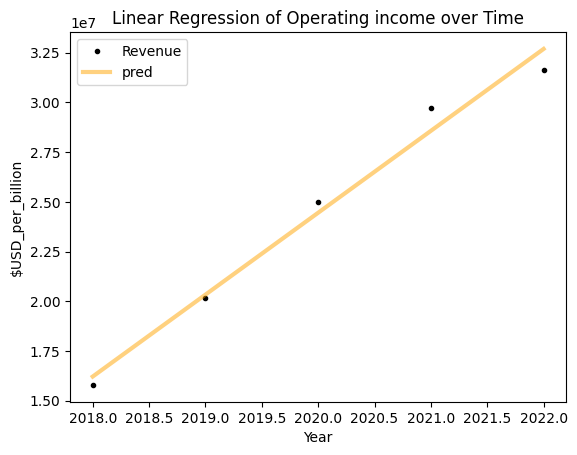

In [36]:
ax = Netflix_income_grouped.plot(x='Year', y='Revenue', color='black', style='.')
Netflix_income_grouped.plot( x='Year', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5)

ax.set_title('Linear Regression of Operating income over Time')
ax.set_xlabel('Year')
ax.set_ylabel('$USD_per_billion')

In [37]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

In [38]:
new_years = np.array([2022, 2023, 2024, 2025, 2026, 2027])
new_X = new_years.reshape(-1,1)

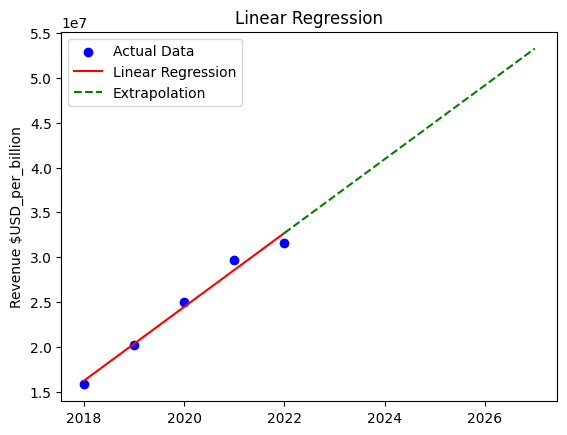

In [39]:
X = Netflix_income_grouped['Year'].values.reshape(-1,1)
y1 = Netflix_income_grouped['Revenue']
reg1 = LinearRegression().fit(X,y1)

y_pred1 = reg1.predict(Netflix_income_grouped['Year'].values.astype(float).reshape(-1, 1))
Netflix_income_grouped['pred1'] = y_pred1

predicted_operate_ex = reg1.predict(new_X)

plt.scatter(Netflix_income_grouped['Year'], Netflix_income_grouped['Revenue'], color='blue', label='Actual Data')

# Plot the linear regression line
plt.plot(Netflix_income_grouped['Year'], reg.predict(X), color='red', label='Linear Regression')

# Extrapolation plot
plt.plot(new_years, predicted_operate_ex, color='green', linestyle='--', label='Extrapolation')

plt.xlabel('')
plt.ylabel('Revenue $USD_per_billion')
plt.title('Linear Regression')
plt.legend()
plt.show()

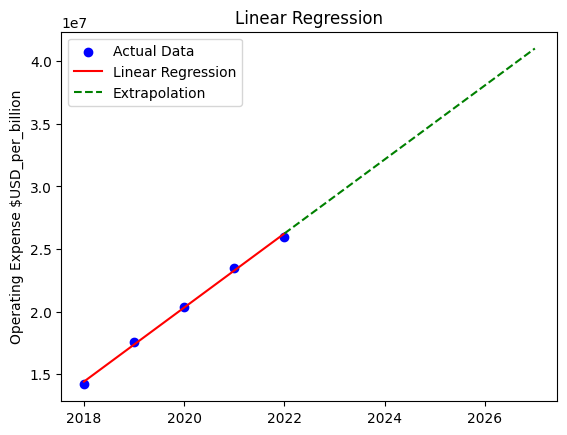

In [40]:
X = Netflix_income_grouped['Year'].values.reshape(-1,1)
y2 = Netflix_income_grouped['Operating Expenses']
reg2 = LinearRegression().fit(X,y2)

y_pred2 = reg2.predict(Netflix_income_grouped['Year'].values.astype(float).reshape(-1, 1))
Netflix_income_grouped['pred2'] = y_pred2

predicted_operate_ex = reg2.predict(new_X)

plt.scatter(Netflix_income_grouped['Year'], Netflix_income_grouped['Operating Expenses'], color='blue', label='Actual Data')

# Plot the linear regression line
plt.plot(Netflix_income_grouped['Year'], reg2.predict(X), color='red', label='Linear Regression')

# Extrapolation plot
plt.plot(new_years, predicted_operate_ex, color='green', linestyle='--', label='Extrapolation')

plt.xlabel('')
plt.ylabel('Operating Expense $USD_per_billion')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [41]:
slope1 = reg.coef_[0]
slope2 = reg2.coef_[0]

In [42]:
print(slope1, slope2)

4118381.5 2953834.9999999995


In [43]:
revenue_2023 = reg.predict([[2023]])
revenue_2024 = reg.predict([[2024]])
predicted_revenue = revenue_2023+revenue_2024
print(predicted_revenue)

[77732765.70000076]


In [44]:
# Normalize the y data (operating income)
Netflix_income_grouped['Normalized Revenue'] = scaler.fit_transform(Netflix_income_grouped[['Revenue']])

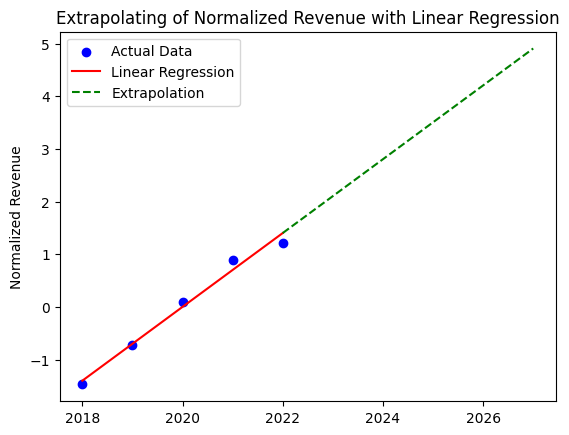

In [45]:
y3 = Netflix_income_grouped['Normalized Revenue']
reg3 = LinearRegression().fit(X,y3)

y_pred3 = reg3.predict(Netflix_income_grouped['Year'].values.astype(float).reshape(-1, 1))
Netflix_income_grouped['pred'] = y_pred3

predicted_operate_ex = reg3.predict(new_X)

plt.scatter(Netflix_income_grouped['Year'], Netflix_income_grouped['Normalized Revenue'], color='blue', label='Actual Data')

# Plot the linear regression line
plt.plot(Netflix_income_grouped['Year'], reg3.predict(X), color='red', label='Linear Regression')

# Extrapolation plot
plt.plot(new_years, predicted_operate_ex, color='green', linestyle='--', label='Extrapolation')

plt.xlabel('')
plt.ylabel('Normalized Revenue')
plt.title('Extrapolating of Normalized Revenue with Linear Regression')
plt.legend()
plt.show()

In [46]:
# Normalize the y data (operating income)
Netflix_income_grouped['Normalized Expenses'] = scaler.fit_transform(Netflix_income_grouped[['Operating Expenses']])

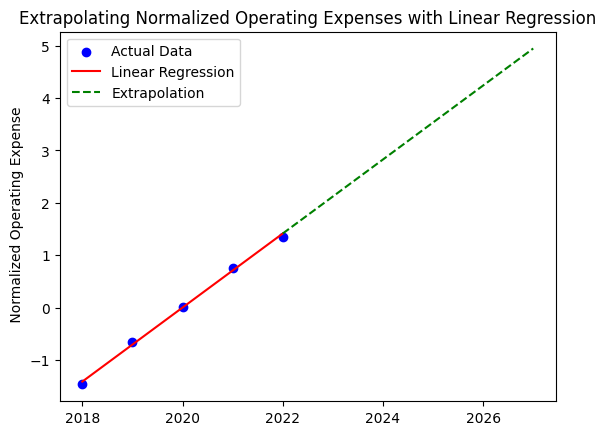

In [47]:
y4 = Netflix_income_grouped['Normalized Expenses']
reg4 = LinearRegression().fit(X,y4)


y_pred4 = reg4.predict(Netflix_income_grouped['Year'].values.astype(float).reshape(-1, 1))
Netflix_income_grouped['pred4'] = y_pred4

predicted_operate_ex = reg4.predict(new_X)

plt.scatter(Netflix_income_grouped['Year'], Netflix_income_grouped['Normalized Expenses'], color='blue', label='Actual Data')

# Plot the linear regression line
plt.plot(Netflix_income_grouped['Year'], reg4.predict(X), color='red', label='Linear Regression')

# Extrapolation plot
plt.plot(new_years, predicted_operate_ex, color='green', linestyle='--', label='Extrapolation')

plt.xlabel('')
plt.ylabel(' Normalized Operating Expense')
plt.title('Extrapolating Normalized Operating Expenses with Linear Regression')
plt.legend()
plt.show()

In [48]:
slope3 = reg3.coef_[0]
slope4 = reg4.coef_[0]
print(slope3, slope4)

0.7010822886439786 0.7062773532199841


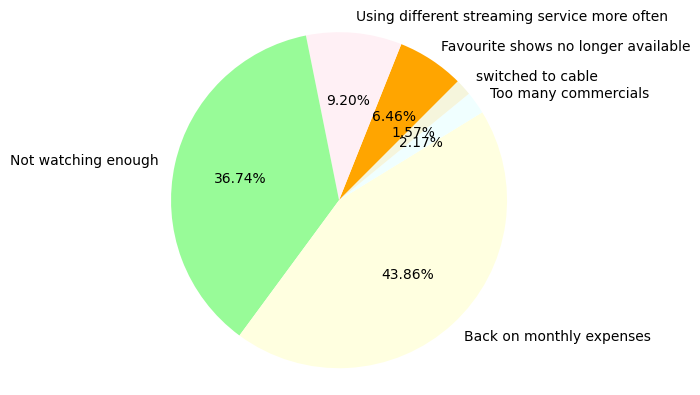

In [49]:
# frequency of some observations using pie chart
labels = 'Favourite shows no longer available', 'Using different streaming service more often', 'Not watching enough', 'Back on monthly expenses', 'Too many commercials', 'switched to cable'
frequency = [6.46, 9.20, 36.74, 43.86, 2.17, 1.57]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0, 0)  
colors = ( "orange", "lavenderblush", "palegreen",
          "lightyellow", "azure", "beige")
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.2f%%', colors=colors,
         startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()
# Information obtained from Review.org which survey 1000 Americans on their streaming habits conducted on Febuary 2023 on their 
# spending habits in the last 6 months